**Introduction**

This code reproduces the results presented in Section 4, "Numerical Studies," of the paper. You can run the codes using Google Colab.

# Basic Setting

In [1]:
!git clone https://github.com/Math-Jacobs/bfm
!pip install bfm/python
!pip install pot
!wget -O functions.py https://raw.githubusercontent.com/kaheonkim/WDHA/main/implementation2D/functions.py
!wget -O metric.py https://raw.githubusercontent.com/kaheonkim/WDHA/main/implementation2D/metric.py

Cloning into 'bfm'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 71 (delta 22), reused 59 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 1.77 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Processing ./bfm/python
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for w2: filename=w2-0.0.1-cp311-cp311-macosx_10_14_x86_64.whl size=92639 sha256=4d4802989a0f036d245cda9dfd72fc459ac91f6921284f8c1bbc9c882b6df276
  Stored in directory: /private/var/folders/ty/glwljgt93kv4cddc7b1kk26c0000gn/T/pip-ephem-wheel-cache-442urloo/wheels/30/43/7a/8d06ed92f5a31bf927d75f0585518e8da13a9422bb2f6b1a6b
Successfully built w2
  Attempting uninstall: w2
    Found existing installation: w2 0.0.1
    Uninstalling w2-0.0.1:
      Successfully uninstalled w2-0.0.1
zsh:1: command

In [2]:
from time import time
import numpy as np
from metric import *
from functions import *

import ot
import matplotlib.pyplot as plt
from w2 import BFM
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['image.cmap'] = 'viridis'

## Dataset and settings

In [3]:
n1, n2 = 1024, 1024
x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1),
                    np.linspace(0.5/n2,1-0.5/n2,n2))
func1 = 1/2 * (x**2 + y**2)

r = 0.1
# Initialize densities
mu1 = np.zeros((n2, n1))
mu1[(x-0.8)**2 + (y-0.8)**2 < r**2] = 1
mu2 = np.zeros((n2, n1))
mu2[(0.8-r/2.5<x) & (x<0.8+r/2.5) & (0.3-r < y) & (y < 0.3+r)] = 1
mu2[(0.3-r/2.5<y) & (y<0.3+r/2.5) & (0.8-r < x) & (x < 0.8+r)] = 1


# Normalize
mu1 *= n1*n2 / np.sum(mu1)
mu2 *= n1*n2 / np.sum(mu2)

heart = np.zeros((n2, n1))
heart[((10*x-2)**2+(10*(y-0.3))**2-1)**3-(10*x-2)**2*(10*(y-0.3))**3<0] = 1
heart *= n1 * n2 / np.sum(heart)

rectangle = np.zeros((n2, n1))
rectangle[(x<0.3) & (x > 0.1) & (y>0.7) & (y<0.9)] = 1
rectangle *= n1*n2 / np.sum(rectangle)

mu = [mu1,mu2, heart, rectangle]

# Shape Example

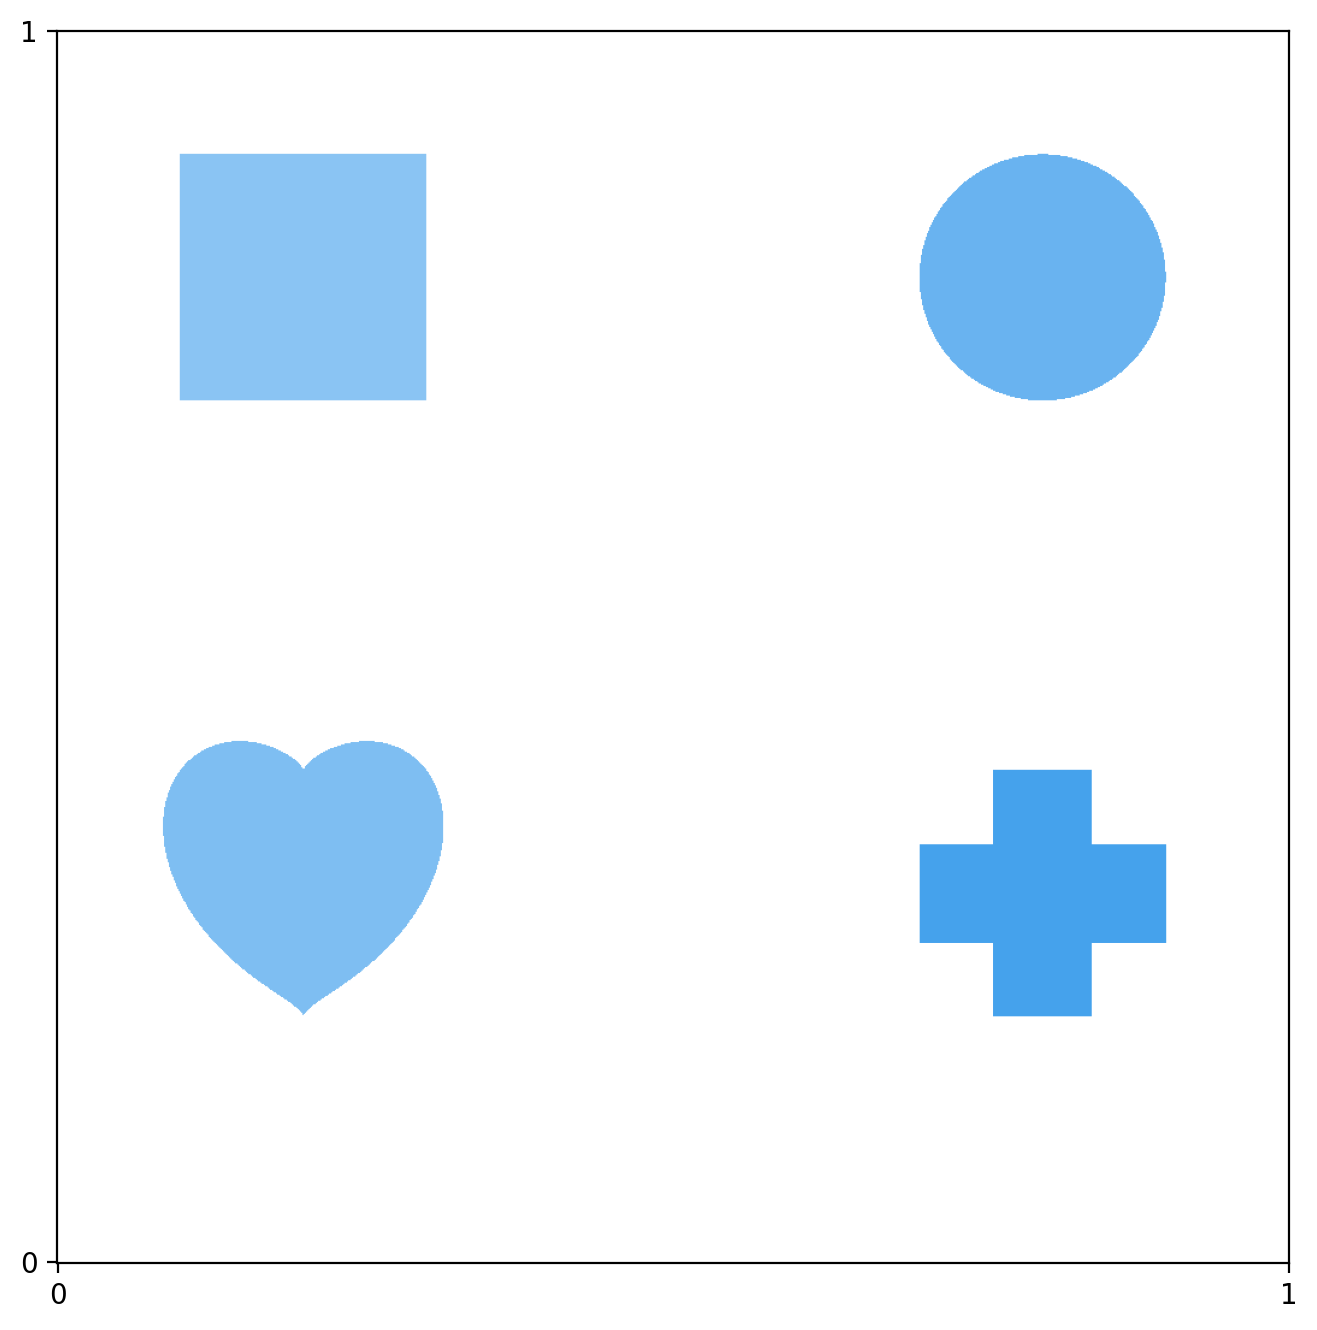

In [4]:
plotting(mu, np.zeros((n2,n1)),'_',save_option = False)

## WDHA

Number of Iterations : 50
Number of Iterations : 100
Number of Iterations : 150
Number of Iterations : 200
Number of Iterations : 250
Number of Iterations : 300


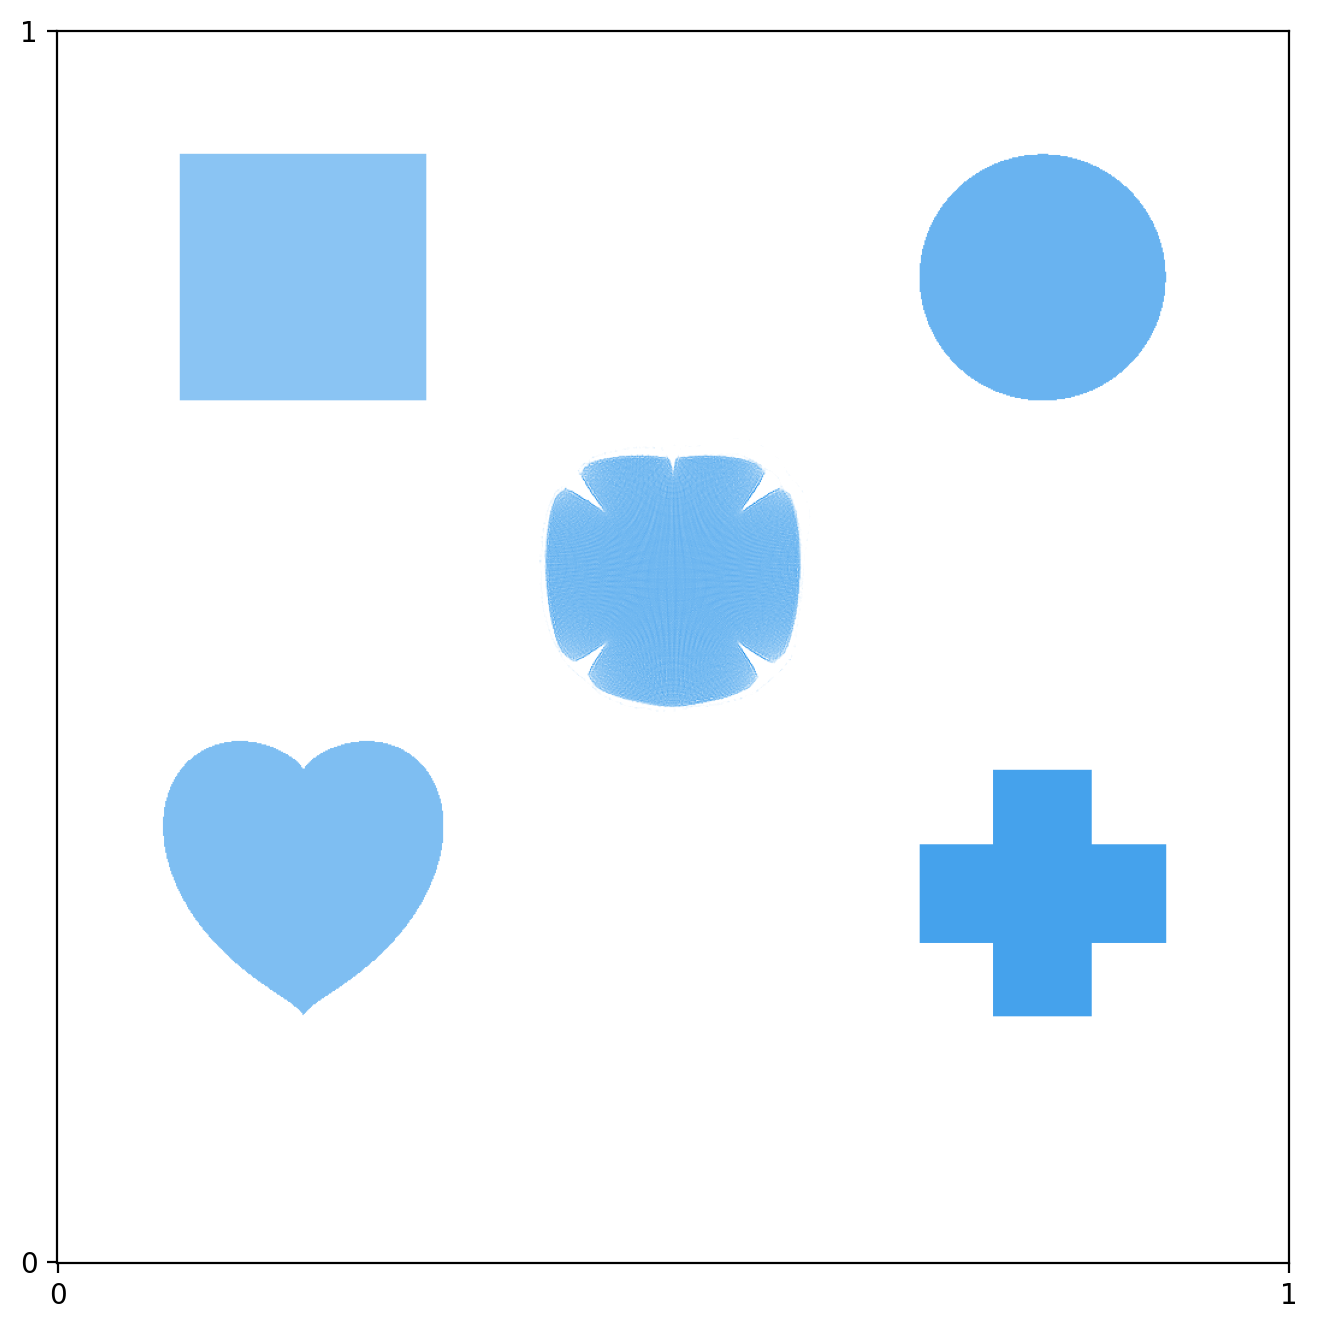

In [5]:
mu_WGHA = frechet_mean(mu, 300, 'MU', save_option = False, return_option = True)

## CWB

In [ ]:
mu_CWB = frechet_mean_pot(mu, 5e-3,'MU',print_option=True, plot_option=True, save_option=False, return_option = True)

## DSB

In [ ]:
mu_DSB = frechet_mean_pot_debiased(mu, 5e-3,'MU',print_option=True, plot_option=True, save_option=False, return_option = True)

## Analysis

Average $W_2$ distance between given distributions and barycenter

In [ ]:
print(avgw2(mu,mu_WGHA),avgw2(mu,mu_CWB),avgw2(mu,mu_DSB))

# MNIST Examples

We use high-dimensional hand digit data(500 x 500) described in 
**Cédric Beaulac and Jeffrey S. Rosenthal,Analysis of a high-resolution hand-written digits data
set with writer characteristics**. Before you start, download Images(500x500).npy and WriterInfo.npy through the link : https://drive.google.com/drive/folders/1f2o1kjXLvcxRgtmMMuDkA2PQ5Zato4Or

In [ ]:
Images = np.load('/content/drive/My Drive/WDHA/Images(500x500).npy')
WriterInfo = np.load('/content/drive/My Drive/WDHA/WriterInfo.npy')
digit = WriterInfo[:,0]
user = WriterInfo[:,-1]
num_image = 100
num_iter = 300
numbers8 = 255 - Images[(digit == 8)][:num_image].astype('float64')

for j in range(num_image):
    numbers8[j] /= np.sum(numbers8[j])
    numbers8[j] *= 500 * 500
del Images, WriterInfo, user, digit

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # 3 rows, 1 column

plotting_mnist(numbers8[0], '', ax=axes[0])
plotting_mnist(numbers8[1], '', ax=axes[1])
plotting_mnist(numbers8[2], '', ax=axes[2])

fig.suptitle("3 Exemplary Digits 8", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
bary8 = frechet_mean(numbers8, num_iter, 'mnist',plot_option = False, save_option = False, return_option = True)
plotting_mnist(bary8, '-')

In [ ]:
tic = time()
weights = np.array([1/num_image] * num_image)
mean_CWB = ot.bregman.convolutional_barycenter2d(numbers8, 5*10**(-3), weights, numItermax = num_iter,stopThr=0.0)

toc = time()
plotting_mnist(mean_CWB, '8CWB', save_option = False)
print(toc-tic)

In [ ]:
tic = time()
weights = np.array([1/num_image] * num_image)
mean_DSB = ot.bregman.convolutional_barycenter2d_debiased(numbers8, 5*10**(-3), weights, numItermax = num_iter,stopThr=0.0)

toc = time()
plotting_mnist(mean_DSB, '8DSB', save_option = False)
print(toc-tic)